<a href="https://colab.research.google.com/github/C-HARRIETH/Hypothyroid-Classification/blob/main/Moringa_DS_Core_W8_Independent_Project_2021_04_Python_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHYROID ANALYSIS

## 1. Defining the Question

### a) Specifying the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [3]:
# Relevant dependencies 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [4]:
# Loading the Dataset
#
missing_values= ['?']
health= pd.read_csv('hypothyroid.csv', na_values=missing_values)

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset

health.shape

(3163, 26)

In [6]:
# Previewing the top of our dataset

health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [7]:
# Checking whether each column has an appropriate datatype

health.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [9]:
health.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

In [10]:
# Unique values
print('Status:', health['status'].unique())
print('Measured TBG:', health['TBG_measured'].unique())
print('Measured FTI:', health['FTI_measured'].unique())
print('Measured T4U:', health['T4U_measured'].unique())
print('Measured TT4:', health['TT4_measured'].unique())
print('Measured TSH:', health['TSH_measured'].unique())
print('Measured T3:', health['T3_measured'].unique())


Status: ['hypothyroid' 'negative']
Measured TBG: ['n' 'y']
Measured FTI: ['y' 'n']
Measured T4U: ['y' 'n']
Measured TT4: ['y' 'n']
Measured TSH: ['y' 'n']
Measured T3: ['y' 'n']


## 4. Tidying the Dataset

In [11]:
# Identifying the Missing Data

health.isnull().values.any()

True

In [12]:
# Dealing with null values

health.drop('TBG', axis=1, inplace=True)
health['FTI'].fillna(health['FTI'].mean(), inplace= True)
health['T4U'].fillna(health['T4U'].mean(), inplace= True)
health['TT4'].fillna(health['TT4'].mean(), inplace= True)
health['T3'].fillna(health['T3'].mean(), inplace= True)
health['TSH'].fillna(health['TSH'].mean(), inplace= True)
health['sex'].fillna(method='ffill', inplace=True)
health['age'].fillna(health['age'].mean(), inplace=True)

In [13]:
# Identifying duplicates

health.duplicated().values.any()

True

In [14]:
# Number of duplicates

health.duplicated().sum()

156

In [15]:
# Dealing with duplicates

health.drop_duplicates(keep='first', inplace=True)

In [16]:
# Confirmation

health.duplicated().values.any()

False

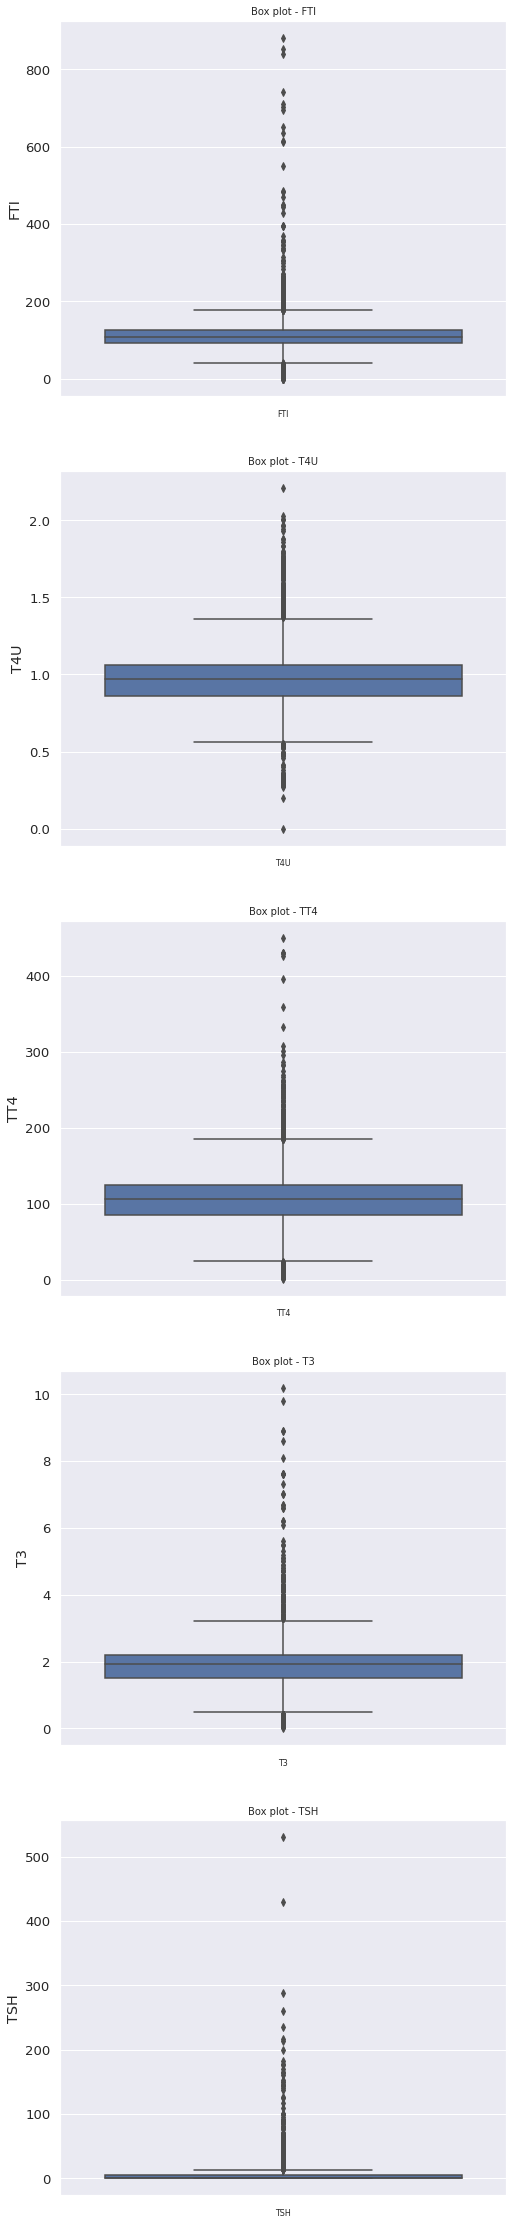

In [17]:
# Checking for outliers

col_names = ['FTI', 'T4U', 'TT4', 'T3', 'TSH']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=health[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

## 5. Exploratory Analysis

In [18]:
ex= ['FTI', 'T4U', 'TT4', 'T3', 'TSH']
health[ex].describe()

,FTI,T4U,TT4,T3,TSH
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,115.484252,0.977593,108.714583,1.934882,5.823557
std,58.535310,0.219705,43.395720,0.876120,22.470602
min,0.000000,0.000000,2.000000,0.000000,0.000000
25%,92.000000,0.860000,85.000000,1.500000,0.000000
50%,109.000000,0.970000,106.000000,1.939749,1.000000
75%,126.000000,1.060000,125.000000,2.200000,5.300000
max,881.000000,2.210000,450.000000,10.200000,530.000000


In [19]:
health.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

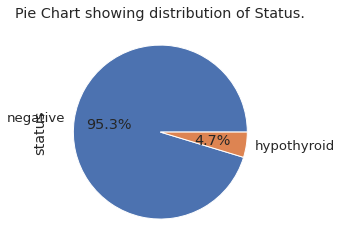

In [20]:
status= health['status'].value_counts()
status.plot.pie(autopct="%.1f%%")
plt.title('Pie Chart showing distribution of Status.')
plt.show()

In [21]:
health['lithium'].value_counts()

f    3005
t       2
Name: lithium, dtype: int64

In [22]:
health['goitre'].value_counts()

f    2912
t      95
Name: goitre, dtype: int64

In [23]:
health['tumor'].value_counts()

f    2967
t      40
Name: tumor, dtype: int64

In [24]:
health['sick'].value_counts()

f    2910
t      97
Name: sick, dtype: int64

In [25]:
health['on_thyroxine'].value_counts()

f    2561
t     446
Name: on_thyroxine, dtype: int64

## 6. Implementing the Solution

In [26]:
# Converting categorical columns into indicator variables

def cat(col):
  health[col] = health[col].astype('category')
  health[col] = health[col].cat.codes


cat('status')
cat('sex')
cat('on_thyroxine')
cat('query_on_thyroxine')
cat('on_antithyroid_medication')
cat('thyroid_surgery')
cat('query_hypothyroid')
cat('query_hyperthyroid')
cat('pregnant')
cat('sick')
cat('tumor')
cat('lithium')
cat('goitre')
cat('TBG_measured')
cat('FTI_measured')
cat('T4U_measured')
cat('TT4_measured')
cat('T3_measured')
cat('TSH_measured')


In [27]:
health.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0


### Random Forest

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the independent and dependent variables
test_features = health.columns.to_list()
test_features.remove('status')

X = health[test_features].values
y = health['status'].values

# Creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Fitting the model
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=10)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

from sklearn import metrics

# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.012918478984900596
Mean Squared Error: 0.0062223065067194714
Root Mean Squared Error: 0.0788815980233633


max_depth has been increased to 10. It gives a better RMSE score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


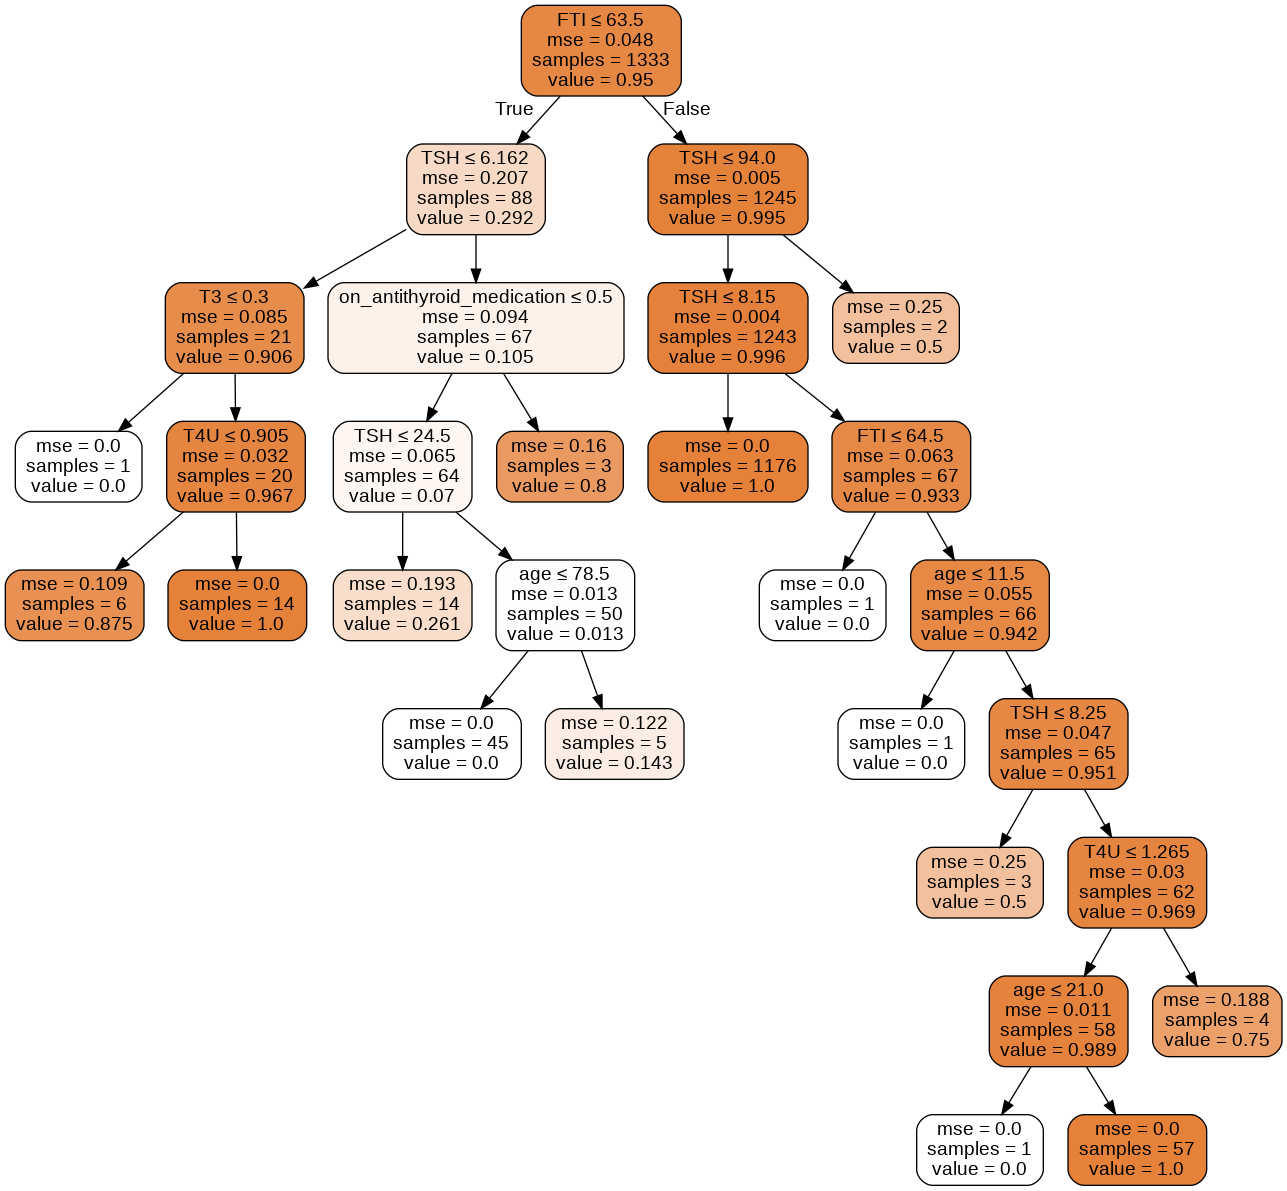

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [31]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Sorting values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.21
Variable: on_antithyroid_medication Importance: 0.03
Variable: age                  Importance: 0.02
Variable: T3                   Importance: 0.02
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: TT4                  Importance: 0.0
Va

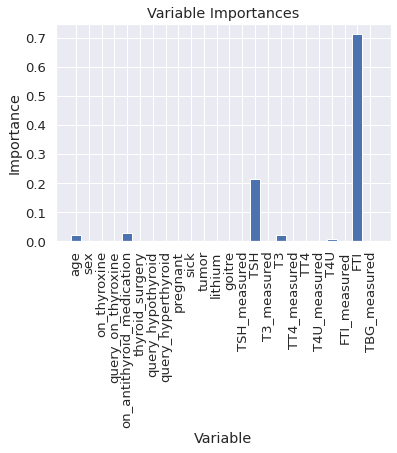

In [32]:
# Visual representation of feature importance
import matplotlib.pyplot as plt

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The FTI column accounts for a majority of feature importance followed by, TSH and on_antithyroid_medication .

Random Forests with the three most important features

In [33]:
# Splitting into train and test
feature= ['FTI', 'TSH', 'on_antithyroid_medication']

X= health[feature].values
y = health['status'].values

# Creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Fitting the model
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

from sklearn import metrics

# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.012684528735879245
Mean Squared Error: 0.006335812970665943
Root Mean Squared Error: 0.07959782013765165


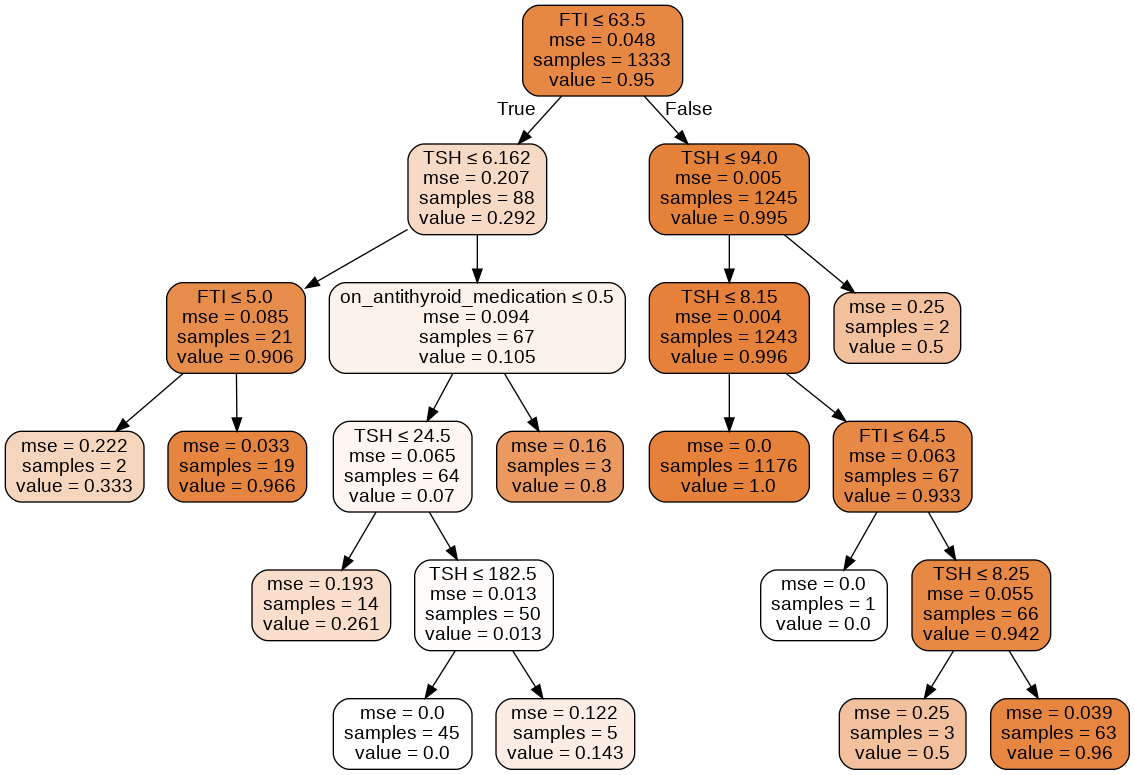

In [35]:
# Decision Tree

dot_data = StringIO()
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid(2).png')
Image(graph.create_png())

### Ada Boost

In [36]:
# Splitting the independent and dependent variables
test_features = health.columns.to_list()
test_features.remove('status')

X = health[test_features].values
y = health['status'].values

# Creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Fitting the model
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=150)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.007751937984496124
Mean Squared Error: 0.007751937984496124
Root Mean Squared Error: 0.08804509063256238


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.6, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [39]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.025397428660317776
Mean Squared Error: 0.009953898332129807
Root Mean Squared Error: 0.09976922537601365


Increasing the learning rate increases the RMSE. 

### Gradient Boost

In [40]:
gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [41]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.017950466699567867
Mean Squared Error: 0.0076944098715408075
Root Mean Squared Error: 0.08771778537754363


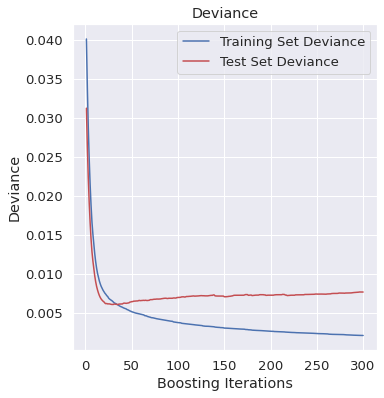

In [42]:
# Deviance plot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# Comparing our predictions against the test data, and computing the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) 

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # Computing the loss function and comparing the actual data with the predictions 
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

From the above models created, Gradient Boost and Random Forest are the most appropriate for the data above. They both perform better than Ada. 

RMSEs:

- Random Forest: 0.0788815980233633

* AdaBoost: 0.08804509063256238

* GradientBoost: 0.08486424322937514

### SVM

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Reduction

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape

(3007, 2)

In [54]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Polynomial Function

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
# Building the model 
polyclassifier = SVC(kernel='poly', degree=3, gamma='scale')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Changing the gamma to auto increases the fitting time. The process takes more than 5 minutes to execute.

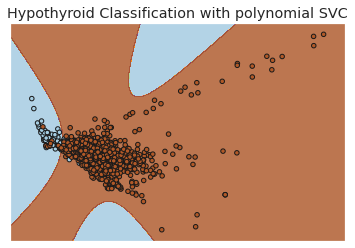

In [59]:
# Create a mesh grid for graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title 
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [57]:
# Prediction
y_pred = polyclassifier.predict(X_test)

In [58]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9833887043189369
[[ 23  12]
 [  3 865]]


#### Radial Basis Function (rbf)

In [60]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

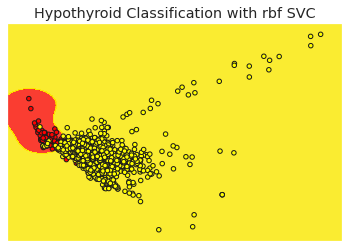

In [61]:
# Create a mesh grid for graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Function creating the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title
title = ('Hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# Prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9833887043189369
[[ 26   9]
 [  6 862]]


#### Sigmoid Function

In [62]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')

# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

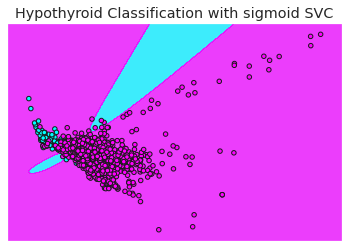

In [63]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title
title = ('Hypothyroid Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9612403100775194
[[  0  35]
 [  0 868]]


From the SVM done, Sigmoid Function performs well but it is the least. Polynomial Function and Radial Basis Function(rbf) perform better than Sigmoid.

Their Accuracy Scores;
* Polynomial Function: 98.34%

* Radial Basis Function: 98.34%

* Sigmoid Function: 96.12%